In [43]:
#Import Required Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)

import warnings
warnings.filterwarnings("ignore")


In [44]:
#Load the Dataset
df = pd.read_csv("DataFile-2.csv")  # update path if needed
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [45]:
#Basic Data Exploration
print(df.shape)
df.info()
df.describe()
df["Churn"].value_counts()


(7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [46]:
#Data Cleaning & Preprocessing
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce") #Handle TotalCharges (often stored as object)
#handles  missing values 
df.isnull().sum()
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True) #handling missing values 

In [47]:
#Drop Unnecessary Column
df.drop("customerID", axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


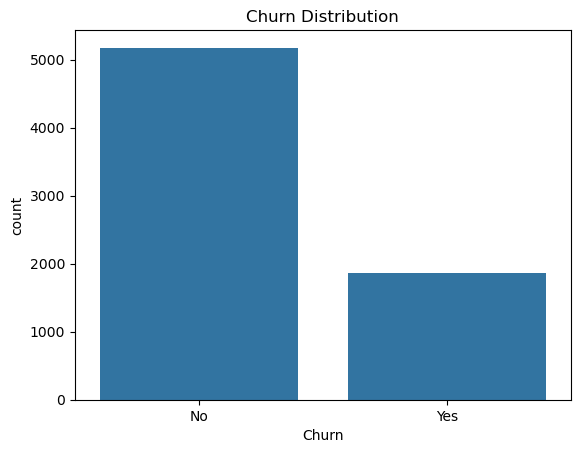

In [48]:
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()


In [49]:
#Encode Target Variable
#df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})
#df.head()

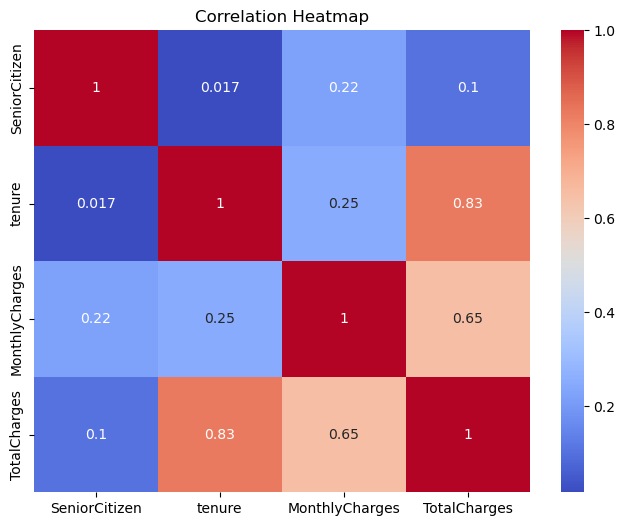

In [50]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


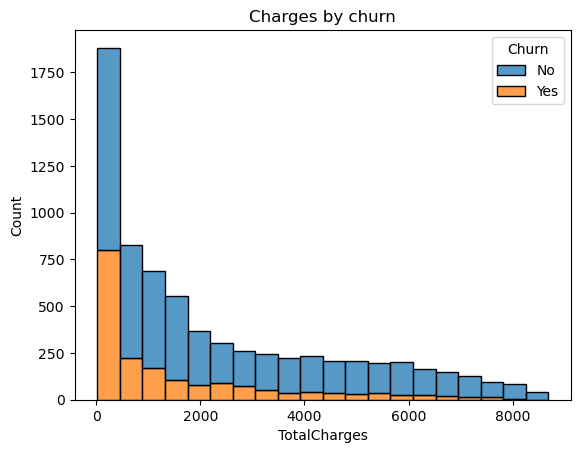

In [51]:
sns.histplot(data=df,x='TotalCharges',hue='Churn',multiple='stack', bins=20)
plt.title('Charges by churn')
plt.show()

In [52]:
# encode categorical variables
label_encoder = {}

for column in ['Churn', 'PhoneService',
  'MultipleLines',
  'InternetService', 
  'OnlineSecurity',    # Removed extra spaces
  'OnlineBackup',      # Removed extra spaces
  'DeviceProtection',  # Removed extra spaces
  'TechSupport',       # Removed extra spaces
  'StreamingTV',       # Removed extra spaces
  'StreamingMovies',   # Removed extra spaces
  'Contract',          # Removed extra spaces
  'PaperlessBilling',  # Removed extra spaces
  'PaymentMethod','gender','Partner','Dependents']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoder[column] = le



X = df.drop(['TotalCharges'], axis=1)
y = df['Churn']
X.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,1


In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [54]:
#Identify Feature Types
categorical_features = X.select_dtypes(include=["object"]).columns
numerical_features = X.select_dtypes(include=["int64", "float64"]).columns
#Preprocessing Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features)
    ]
)


In [55]:
#Logistic Regression

#Pipeline
log_reg = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", LogisticRegression(max_iter=1000))
    ]
)
#Hyperparameter Tuning
param_grid_lr = {
    "classifier__C": [0.01, 0.1, 1, 10]
}

grid_lr = GridSearchCV(              #Tries every parameter combination
                                    #Trains model multiple times
                                    #Trains model multiple time
                                    #Tests performance
                                    #Picks best one
    log_reg,           
    param_grid_lr,
    cv=5,                    #5-fold cross validation.#Data is split into 5 parts and tested repeatedly.
    scoring="f1"              #Classes are imbalanced
)

grid_lr.fit(X_train,y_train)
grid_lr.best_params_


{'classifier__C': 0.01}

In [56]:
#evaluation 
y_pred_lr = grid_lr.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_lr))


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1035
           1       1.00      1.00      1.00       374

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409



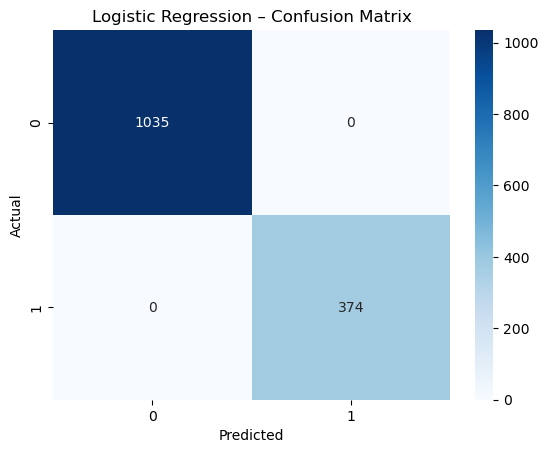

In [57]:
sns.heatmap(
    confusion_matrix(y_test, y_pred_lr),
    annot=True,
    fmt="d",
    cmap="Blues"
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression – Confusion Matrix")
plt.show()


In [64]:
feature_names = X.columns
print(feature_names)


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'Churn'],
      dtype='object')


In [69]:
# Create empty row with all columns
new_data = pd.DataFrame(columns=X.columns)
new_data.loc[0] = 0

# Fill values
new_data["gender"] = "Female"
new_data["SeniorCitizen"] = 0
new_data["Partner"] = "Yes"
new_data["Dependents"] = "No"
new_data["tenure"] = 5
new_data["PhoneService"] = "Yes"
new_data["MultipleLines"] = "No"
new_data["InternetService"] = "Fiber optic"
new_data["OnlineSecurity"] = "No"
new_data["OnlineBackup"] = "Yes"
new_data["DeviceProtection"] = "No"
new_data["TechSupport"] = "No"
new_data["StreamingTV"] = "Yes"
new_data["StreamingMovies"] = "No"
new_data["Contract"] = "Month-to-month"
new_data["PaperlessBilling"] = "Yes"
new_data["PaymentMethod"] = "Electronic check"
new_data["MonthlyCharges"] = 75.5
new_data["TotalCharges"] = 400

# Encode categorical columns
for col in new_data.select_dtypes("object"):
    new_data[col] = le.fit_transform(new_data[col])

# Predict
prediction = final_model.predict(new_data)
prediction_prob = final_model.predict_proba(new_data)

print("Churn Prediction:", "YES" if prediction[0]==1 else "NO")
print("Churn Probability:", round(prediction_prob[0][1]*100,2), "%")


Churn Prediction: NO
Churn Probability: 5.39 %
